In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
import yfinance as yf
xmr = yf.Ticker("XMR-USD")
df_xmr = yf.download(tickers = "XMR-USD",
                     start = "2022-09-07",
                     end = "2023-09-09" ,
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score , recall_score , precision_score , confusion_matrix, auc
from sklearn.model_selection import GridSearchCV , train_test_split

In [11]:
n_days = 10
## values of close column
close = df_xmr["Close"]
# array to save best params and score for each number of day
best_params = []
best_score = []
best_est = []
best_ind = []
# array to save input and output for each day
X_s = []
y_s = []
# arrays to save scores for train data
f_train = []
r_train = []
p_train = []
# array to save scores for validation data
f_val = []
r_val = []
p_val = []
# calc scores for each day
for i in range(1, n_days) :
    X = []
    y = []
    # make input and output datas for each day
    for j in range(i,len(close)) :
        f = []
        for l in range(i) :
            f.append(close[j-l])
        X.append(f)
        y.append((close[j]-close[j-1])> 0)
    X_s.append(X)
    y_s.append(y)
    params = {'loss': ['log_loss', 'exponential'] , 'learning_rate' : [0.1 , 0.5 , 1] , 'n_estimators' : [100 , 500 , 1000] , 'max_depth' : [3,5,8,None]}
    xgboost = GradientBoostingClassifier()
    clf = GridSearchCV(estimator=xgboost , param_grid=params , cv = 5)
    clf.fit(X,y)
    # append best thing to arrays
    best_params.append(clf.best_params_ )
    best_score.append(clf.best_score_)
    best_est.append(clf.best_estimator_)
    best_ind.append(clf.best_index_)
    print("n day : ",i)
    print("best params : ",clf.best_params_ )
    print("best score : ",clf.best_score_)
    # make train and validation data
    x_train , x_val , y_train , y_val = train_test_split(X , y , test_size = 0.3 , random_state = 42)
    # predict using train and val data
    y_pred_train = clf.predict(x_train)
    y_pred_val = clf.predict(x_val)
    # calc scores for train data and append them
    f1_train = f1_score(y_train , y_pred_train)
    recall_train = recall_score(y_train,y_pred_train)
    precision_train = precision_score(y_train,y_pred_train)
    f_train.append(f1_train)
    r_train.append(recall_train)
    p_train.append(precision_train)
    # calc scores for validation data and append them
    f1_val = f1_score(y_val , y_pred_val)
    recall_val = recall_score(y_val , y_pred_val)
    precision_val = precision_score(y_val , y_pred_val)
    f_val.append(f1_val)
    r_val.append(recall_val)
    p_val.append(precision_val)

n day :  1
best params :  {'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'n_estimators': 500}
best score :  0.4728248796741948
n day :  2
best params :  {'learning_rate': 0.5, 'loss': 'log_loss', 'max_depth': None, 'n_estimators': 100}
best score :  0.8602739726027396
n day :  3
best params :  {'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 5, 'n_estimators': 100}
best score :  0.8435692541856925
n day :  4
best params :  {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 5, 'n_estimators': 100}
best score :  0.8430365296803654
n day :  5
best params :  {'learning_rate': 0.5, 'loss': 'exponential', 'max_depth': 5, 'n_estimators': 100}
best score :  0.8289573820395738
n day :  6
best params :  {'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 8, 'n_estimators': 1000}
best score :  0.8282724505327245
n day :  7
best params :  {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 100}
best score :  0.8222222222222222
n day :  8
bes

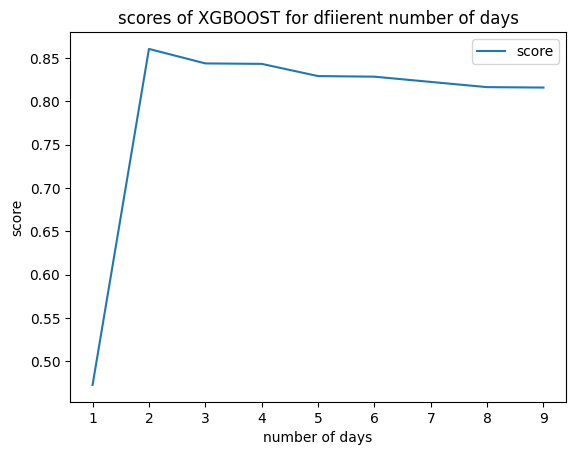

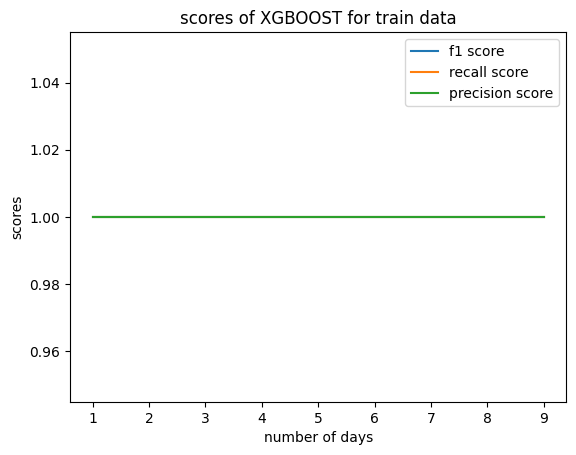

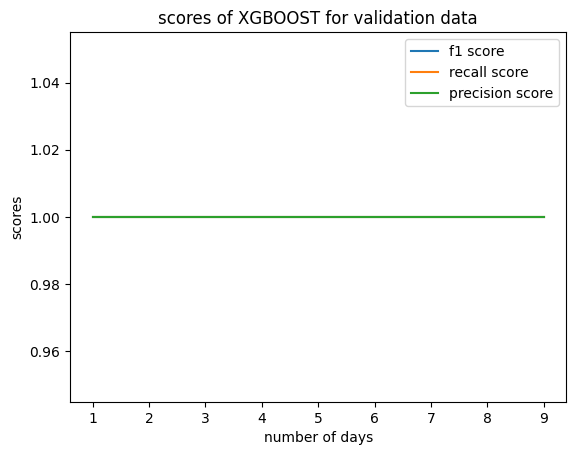

In [13]:
# plot best scores for days
plt.plot([i for i in range(1,n_days)] , best_score , label = "score")
plt.xlabel("number of days")
plt.ylabel("score")
plt.legend()
plt.title("scores of XGBOOST for dfiierent number of days")
plt.show()
# plot scores for train data in different days
plt.plot([i for i in range(1,n_days)] , f_train , label = "f1 score")
plt.plot([i for i in range(1,n_days)] , r_train , label = "recall score")
plt.plot([i for i in range(1,n_days)] , p_train , label = "precision score")
plt.xlabel("number of days")
plt.ylabel("scores")
plt.legend()
plt.title("scores of XGBOOST for train data")
plt.show()
# plot scores for validation data
plt.plot([i for i in range(1,n_days)] , f_val , label = "f1 score")
plt.plot([i for i in range(1,n_days)] , r_val , label = "recall score")
plt.plot([i for i in range(1,n_days)] , p_val , label = "precision score")
plt.xlabel("number of days")
plt.ylabel("scores")
plt.legend()
plt.title("scores of XGBOOST for validation data")
plt.show()

In [14]:
# test data frame
df_test = yf.download(tickers = "XMR-USD",
                     start = "2023-09-04",
                     end = "2023-10-07" ,
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [21]:
best_day = 2
y_test = []
x_test = []
# make input and labels for test data
close_test = df_test["Close"]
for i in range(best_day , len(df_test)) :
    f = []
    for j in range(best_day) :
      f.append(close_test[i-j])
    x_test.append(f)
    y_test.append(close_test[i]-close_test[i-1] > 0 )

# make model using best params {learning_rate = 0.5 , loss = 'log_loss' , max_depth = None, n_estimators = 100}
xgboost = GradientBoostingClassifier(learning_rate = 0.5 , loss = 'log_loss' , max_depth = None, n_estimators = 100 )
xgboost.fit(X_s[best_day-1] , y_s[best_day-1])
y_pred_test = xgboost.predict(x_test)
# calc scores for test data
print("for test data : ")
f_test = f1_score(y_test, y_pred_test)
r_test = recall_score(y_test, y_pred_test)
p_test = precision_score(y_test , y_pred_test)
auc_sc = auc(y_test , y_pred_test)
conf = confusion_matrix(y_test , y_pred_test)
print(f"f1 : {f_test}\nrecall : {r_test}\nprecision : {p_test}\nauc : {auc_sc}\nconfusion matrix : ")
print(conf)

for test data : 
f1 : 0.9500000000000001
recall : 1.0
precision : 0.9047619047619048
auc : 8.0
confusion matrix : 
[[10  2]
 [ 0 19]]
